# Logistic Regression 

### Useful Imports

In [72]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score ,roc_auc_score



#### Some global variables that can be used to check specific outputs

In [73]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the graphs

## STEP 1: LOADING THE DATASET AND VISUALISING IT

In [74]:
# read dataset (data.csv) using pandas.read_pickle. Note: this command will return a numpy array 
names =[
    'location',
    'country',
    'gender',
    'age',
    'vis_wuhan', 'from_wuhan',
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
    'diff_sym_hos',
    'result'
]
data_set=  pd.read_csv("data.csv") # data inside data.pkl saved in numpy array 
# print the size of the dataset i.e the length of the numpy array
data_set_size = len(data_set)
print(data_set_size )


863


Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [75]:
data_set.head(6)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


## Visualize the data

Text(0, 0.5, 'I2')

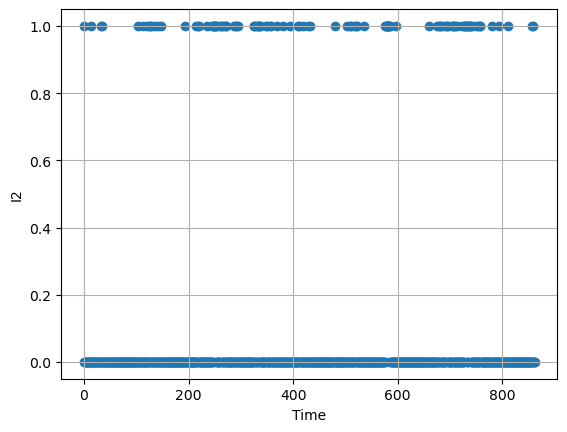

In [76]:
id= data_set['Unnamed: 0']
# print(t)
result = data_set['result']
# print(y)

plt.scatter(id,result)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("I2")

## extract Y Training

In [77]:
Result_Training = data_set['result']
Features_Training = data_set[[
    'location',
    'country',
    'gender',
    'age',
    'vis_wuhan', 'from_wuhan',
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
    'diff_sym_hos']]
print(Features_Training)

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
0         104        8       1  66.0          1           0        14   
1         101        8       0  56.0          0           1        14   
2         137        8       1  46.0          0           1        14   
3         116        8       0  60.0          1           0        14   
4         116        8       1  58.0          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
858        48        3       2  24.0          0           0        14   
859         0        0       2  35.0          0           0        14   
860         3        1       1  49.4          0           0        14   
861        24        9       1  49.4          0           0        14   
862        15       27       1  70.0          0           0        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0          31        19        12         3         1

## split data to test and training

In [78]:
X_train, X_test, y_train, y_test = train_test_split(Features_Training, Result_Training,test_size=0.2, random_state = 1)
print(X_train)

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
207        51       18       1  55.0          0           1         6   
61        132        8       1  52.0          1           0        14   
853        10        4       1  49.4          0           0        14   
345        44       18       1  55.0          0           0        14   
838        61       19       2  49.4          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
715        45       13       1  51.0          0           0         6   
767       122       31       2  49.4          0           0        14   
72        135        8       0  39.0          1           0        14   
235       128       18       0  85.0          0           0        14   
37         13        8       0  33.0          0           1        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
207        31        19        12         3         1

## fit the model for KNN

In [79]:
import math as mth
# k = mth.isqrt(data_set_size)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
# ypred_KNN= knn.predict(X_test) 


KNeighborsClassifier()

#### Get best value of K for fit the dataset

In [85]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train,y_train)

# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']
# Print the best parameter value
print(f'Best value for n_neighbors: {best_n_neighbors}')

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_train, y_train)

ypred_KNN = best_knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, ypred_KNN)
print(f'Accuracy: {accuracy}')

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'jaccard_macro', 'adjusted_mutual_info_score', 'recall_micro', 'homogeneity_score', 'r2', 'accuracy', 'neg_mean_poisson_deviance', 'neg_negative_likelihood_ratio', 'normalized_mutual_info_score', 'roc_auc_ovo', 'v_measure_score', 'neg_brier_score', 'average_precision', 'neg_mean_absolute_error', 'rand_score', 'recall', 'recall_samples', 'completeness_score', 'neg_median_absolute_error', 'jaccard_weighted', 'matthews_corrcoef', 'f1_samples', 'neg_mean_gamma_deviance', 'f1_micro', 'roc_auc_ovr_weighted', 'balanced_accuracy', 'neg_root_mean_squared_error', 'max_error', 'mutual_info_score', 'f1_macro', 'explained_variance', 'precision_micro', 'precision_weighted', 'f1_weighted', 'precision_samples', 'fowlkes_mallows_score', 'positive_likelihood_ratio', 'precision_macro', 'jaccard', 'adjusted_rand_score', 'neg_mean_squared_log_error', 'precision', 'roc_auc_ovr', 'recall_weighted', 'jaccard_samples', 'roc_auc', 'roc_auc_ovo_weighted', 'recall_macro', 'top_k_accuracy', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'jaccard_micro', 'f1', 'neg_log_loss'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'f1_score' instead.

## fit the model for Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ypred_logreg = logreg.predict(X_test)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## fit the model for Naive Bayes

# Compare the performance

## Perfomance for KNN

In [82]:
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score ,roc_auc_score
result = f1_score(y_test, ypred_KNN)
print("f1_score:")
print(result)
recall = recall_score(y_test, ypred_KNN)
print("recall_score:",)
print (recall)
precision = precision_score(y_test,ypred_KNN)
print("precision_score:",precision)
roc_auc = roc_auc_score(y_test,ypred_KNN)
print("roc_auc_score:",roc_auc)

accuracy = accuracy_score(y_test,ypred_KNN)
print("accuracy_score:",accuracy)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)


f1_score:
0.6666666666666665
recall_score:
0.6
precision_score: 0.75
roc_auc_score: 0.7869281045751634
accuracy_score: 0.930635838150289
F1: 0.6666666666666665


## Performance for Logistic Regression

In [83]:
result = f1_score(y_test, ypred_logreg)
print("f1_score:")
print(result)
recall = recall_score(y_test, ypred_logreg)
print("recall_score:",)
print (recall)
precision = precision_score(y_test,ypred_logreg)
print("precision_score:",precision)
roc_auc = roc_auc_score(y_test,ypred_logreg)
print("roc_auc_score:",roc_auc)

accuracy = accuracy_score(y_test,ypred_logreg)
print("accuracy_score:",accuracy)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)


f1_score:
0.6857142857142857
recall_score:
0.6
precision_score: 0.8
roc_auc_score: 0.7901960784313725
accuracy_score: 0.9364161849710982
F1: 0.6857142857142857
